In [3]:
import glob
import os
# import imagehash
from PIL import Image
import os
from collections import defaultdict

In [4]:
def folder_num_of_files(path):
    files = glob.glob(path)
    nb_files = len(files)
    return nb_files

In [5]:
def folder_num(folder_path):
    file_count = 0
    for item in os.listdir(folder_path):
    # Construct the full path of the item
        item_path = os.path.join(folder_path, item)
        # Check if the item is a file
        if os.path.isfile(item_path):
            # Increment the file count
            file_count += 1
    return file_count

In [6]:
images_num_after_delete = {}
data_dir = os.path.join("..", "filtered_augmentations/Regular")
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        images_num_after_delete[folder_name] = folder_num(folder_path)

In [9]:
images_num_before_delete = {}
original_data_dir = os.path.join(os.path.join("..", "data_original"), "train")
for folder_name in os.listdir(original_data_dir):
    folder_path = os.path.join(original_data_dir, folder_name)
    if os.path.isdir(folder_path):
        images_num_before_delete[folder_name] = folder_num(folder_path) + 1

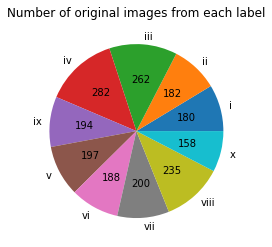

In [12]:
import matplotlib.pyplot as plt
import numpy as np

sizes = np.array(list(images_num_before_delete.values()))
labels = sorted(list(images_num_before_delete.keys()))
def absolute_value(val):
    a  = int(np.round(val/100.*sizes.sum(), 0))
    return a

plt.pie(sizes, labels=labels, autopct=absolute_value, rotatelabels=False)
plt.title("Number of original images from each label")
plt.show()

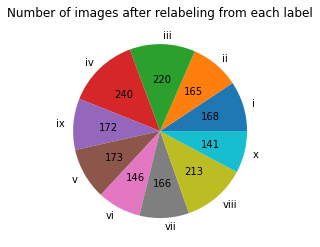

In [13]:
import matplotlib.pyplot as plt
import numpy as np

sizes = np.array(list(images_num_after_delete.values()))
labels = sorted(list(images_num_before_delete.keys()))
def absolute_value(val):
    a  = int(np.round(val/100.*sizes.sum(), 0))
    return a

plt.pie(sizes, labels=labels, autopct=absolute_value, rotatelabels=False)
plt.title("Number of images after relabeling from each label")
plt.show()

In [ ]:
def find_duplicates(image_paths, similarity_threshold):
    hash_dict = defaultdict(list)
    duplicates = []

    for path in image_paths:
        image = Image.open(path)
        image_hash = str(imagehash.average_hash(image))
        hash_dict[image_hash].append(path)

    for hash_value, paths in hash_dict.items():
        if len(paths) > 1:
            duplicates.extend(paths)

    similar_duplicates = []
    for i, path1 in enumerate(duplicates[:-1]):
        image1 = Image.open(path1)
        hash1 = imagehash.average_hash(image1)
        
        for path2 in duplicates[i+1:]:
            image2 = Image.open(path2)
            hash2 = imagehash.average_hash(image2)
            
            if hash1 - hash2 <= similarity_threshold:
                similar_duplicates.append(path2)

    return similar_duplicates

In [57]:
data_dir = os.path.join("..", "all_data")
def find_duplicates(folder_path, similarity_threshold=2):
    hash_dict = defaultdict(list)
    duplicates = []
    for item in os.listdir(folder_path):
        image_path = os.path.join(folder_path, item)
        if os.path.isfile(image_path):
            image = Image.open(image_path)
            image_hash = str(imagehash.phash(image))
            hash_dict[image_hash].append(image_path)

    for paths in hash_dict.values():
        if len(paths) > 1:
            duplicates.extend(paths)

    similar_duplicates = []
    for i, path1 in enumerate(duplicates[:-1]):
        image1 = Image.open(path1)
        hash1 = imagehash.phash(image1)
        
        for path2 in duplicates[i+1:]:
            image2 = Image.open(path2)
            hash2 = imagehash.phash(image2)
            if hash1 - hash2 <= similarity_threshold:
                similar_duplicates.append((path1, path2))

    return similar_duplicates

print(find_duplicates(os.path.join("..", "delete")))
print(find_duplicates(os.path.join(data_dir, "x")))

[('../delete/afc8f028-ce5d-11eb-b317-38f9d35ea60f.png', '../delete/aee14818-ce5d-11eb-b317-38f9d35ea60f-ix.png')]
[('../all_data/x/b2ef9e46-ce5d-11eb-b317-38f9d35ea60f.png', '../all_data/x/af9bd03e-ce5d-11eb-b317-38f9d35ea60f.png')]
